In [247]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [249]:
data = pd.read_csv('ctrain.csv', header=0)
print(data.shape)
print(list(data.columns))

(34872, 17)
['Unnamed: 0', 'id', 'Sex', 'Age', 'high_BP', 'heart_condition_detected_2017', 'married', 'average_blood_sugar', 'BMI', 'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018', 'job_status', 'living_status']


In [250]:
data.head(999999)

,Unnamed: 0,id,Sex,Age,high_BP,heart_condition_detected_2017,married,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018,job_status,living_status
0,0,16053,F,61.0,1,0,1,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0,GOVERNMENT,REMOTE
1,1,1459,F,30.0,0,0,0,107.95,30.4,quit,NaN,NaN,NaN,NaN,0,PRIVATE_SECTOR,REMOTE
2,2,7678,F,51.0,1,0,1,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0,GOVERNMENT,REMOTE
3,3,34943,F,54.0,0,0,1,113.98,57.3,quit,NaN,NaN,NaN,NaN,0,GOVERNMENT,CITY
4,4,17741,M,27.0,0,0,0,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,0,PRIVATE_SECTOR,CITY
5,5,26198,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,PRIVATE_SECTOR,REMOTE
6,6,7284,M,63.0,0,0,1,100.85,37.5,non-smoker,NaN,NaN,NaN,NaN,0,PRIVATE_SECTOR,CITY
7,7,10704,M,55.0,0,1,1,188.39,NaN,NaN,0.0,0.0,0.0,0.0,0,BUSINESS_OWNER,REMOTE
8,8,41988,F,37.0,0,0,0,161.72,23.1,NaN,NaN,NaN,NaN,NaN,0,PRIVATE_SECTOR,CITY
9,9,12578,M,49.0,0,0,1,91.02,30.4,active_smoker,NaN,NaN,NaN,NaN,0,PRIVATE_SECTOR,CITY


In [251]:
high_BP_fix = data['high_BP'].unique()
print(high_BP_fix)
print(len(high_BP_fix))

[1 0]
2


In [253]:
heart_condition_detected_2017_fix = data['BMI'].unique()
print(heart_condition_detected_2017_fix)
print(len(heart_condition_detected_2017_fix))

[36.6 30.4 42.1 57.3 26.7  nan 37.5 23.1 23.8 34.2 36.5 50.7 36.1 20.1
 37.6 49.7 21.9 32.3 34.9 52.7 31.1 31.8 34.  14.4 39.3 28.8 33.8 20.7
 40.1 27.2 27.6 23.4 32.1 48.  35.5 30.3 25.1 31.3 26.1 45.5 30.6 35.3
 44.2 48.5 37.4 18.9 26.6 20.2 34.7 17.8 27.1 21.7 24.5 28.6 24.3 28.3
 28.9 38.5 25.4 31.7 36.  33.  39.9 32.9 31.4 44.3 23.5 26.4 26.9 38.6
 32.6 31.5 40.2 19.3 23.9 38.9 48.2 31.2 28.5 23.3 33.3 25.8 32.2 38.7
 39.8 29.4 30.5 26.3 33.9 34.1 30.8 28.1 27.3 30.7 24.1 29.6 26.2 33.1
 33.2 30.  26.  29.9 42.3 22.8 17.9 29.1 41.2 25.5 32.7 34.5 33.6 29.2
 25.6 36.2 22.4 18.5 28.7 41.7 40.4 29.5 24.6 34.3 20.3 48.7 21.5 37.8
 20.5 35.1 25.3 19.8 38.4 57.1 38.2 41.1 32.  41.5 22.5 16.7 31.6 50.5
 19.4 44.6 38.8 45.7 22.3 20.4 41.  35.4 25.2 27.  49.2 36.3 24.2 67.8
 49.8 35.7 34.8 55.6 27.5 29.8 38.3 28.2 17.7 24.4 27.7 29.  43.1 43.5
 35.9 39.6 24.7 24.9 37.7 37.3 26.8 32.8 25.7 42.2 24.  19.7 17.1 29.7
 35.8 25.9 41.6 36.7 39.5 46.1 47.1 24.8 51.3 23.7 22.9 26.5 28.  19.1
 37.  

In [254]:
data['stroke_in_2018'].value_counts()

0    34220
1      652
Name: stroke_in_2018, dtype: int64

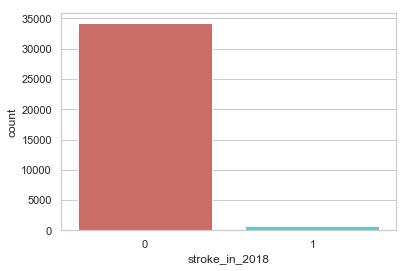

In [255]:
sns.countplot(x='stroke_in_2018',data=data, palette='hls')
plt.show()

In [245]:
count_no_sub = len(data[data['stroke_in_2018']=='0'])
count_sub = len(data[data['stroke_in_2018']=='1'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("yes stroke%", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("no stroke%", pct_of_sub*100)

yes stroke% 98.13030511585225
no stroke% 1.8696948841477403


In [246]:

data.groupby('stroke_in_2018').mean()

,id,high_BP,heart_condition_detected_2017,married,average_blood_sugar,BMI,TreatmentA,TreatmentB,TreatmentC,TreatmentD
stroke_in_2018,,,,,,,,,,
0,21720.226885,0.090532,0.044039,0.637493,108.706444,30.907990,0.195753,0.297279,0.196417,0.193762
1,22409.075153,0.253067,0.225460,0.894172,133.826098,32.251487,0.094595,0.168919,0.141892,0.493243


,average_blood_sugar,TreatmentA,TreatmentB,TreatmentC
id,,,,
2,115.49,NaN,NaN,NaN
3,73.64,NaN,NaN,NaN
5,215.55,NaN,NaN,NaN
6,82.19,NaN,NaN,NaN
8,82.27,NaN,NaN,NaN
9,210.44,NaN,NaN,NaN
10,81.68,NaN,NaN,NaN
11,61.68,0.0,1.0,0.0
12,167.56,NaN,NaN,NaN
